In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables

Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
values = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
values_df = pd.DataFrame(values)
values_final_df = values_df.set_index("date")
values_final_df

# Sort the dataframe by date




,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


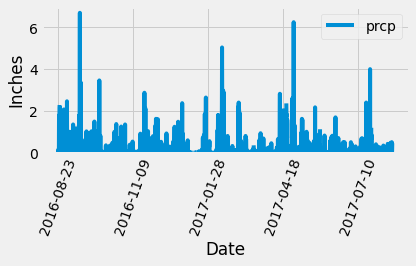

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
values_final_df.plot()
plt.ylim(0,7)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
values_final_df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
total_number_stations= session.query(Station.station).count()
total_number_stations

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all() 

print(active_stations) 

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).first()

most_active_station_number = most_active_station[0]
most_active_station_number 

lowest_temperature = session.query(func.min(Measurement.tobs)).\
  filter(Measurement.station==most_active_station_number).all()
print(lowest_temperature) 

highest_temperature = session.query(func.max(Measurement.tobs)).\
  filter(Measurement.station==most_active_station_number).all()

print(highest_temperature)
    
average_temperature = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station==most_active_station_number).all()

print(average_temperature)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_date_station = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station_number).\
    order_by(Measurement.date.desc()).first()


twelve_month_values = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station_number).\
    filter(Measurement.date > '2016-08-17').all()

twelve_month_tobs_values_df = pd.DataFrame(twelve_month_values)["tobs"]
twelve_month_tobs_values_df 

0      80.0
1      79.0
2      81.0
3      79.0
4      78.0
       ... 
352    77.0
353    77.0
354    76.0
355    76.0
356    79.0
Name: tobs, Length: 357, dtype: float64

(0.0, 70.0)

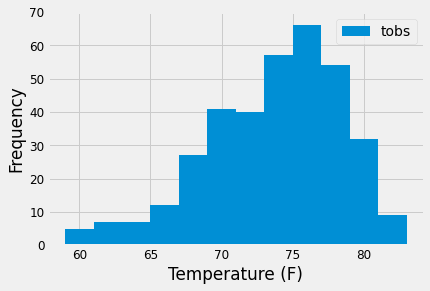

In [17]:
hist = twelve_month_tobs_values_df.hist(bins=12) 
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend(["tobs"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

# Close session

In [18]:
# Close Session
session.close()